# Using Numpy

In [1]:
%matplotlib inline 

In [2]:
import os, sys, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
def knnEucledianIdxs(X,v,k):
        distances = np.sqrt(np.sum((X-v)**2, axis=1))
        #print distances
        closest_idxs = np.argsort(distances)[:k]
        #print closest_idxs

        return closest_idxs

def knnEucledian(X,v,k):
        idxs = knnEucledianIdxs(X,v,k)    
        #print X[idxs]

        return X[idxs]

def knnEucledianLabels(X,y,v,k):
        closest_neighbours = knnEucledianIdxs(X, v, k)
        labels = y[closest_neighbours]
        unq, count = np.unique(labels, return_counts=True)
        c_dict = {l: c for l, c in zip(unq, count)}
        
        return unq[np.argmax(count)], c_dict

def knnPredict(X,y,v,k, y_label=None, dist_measure_func=knnEucledianIdxs):
        
        pred_label, c_dict = knnEucledianLabels(X, y, v, k)

        return pred_label

def knnCosine(X,v,k):
        xy = np.dot(X,v)
        x2 = np.sqrt(np.sum(X**2, axis=1))
        y2 = np.sqrt(np.sum(v**2))
        
        distances = (xy/x2)/y2
        
        return X[np.argsort(distances)[:k]]

def getAccuracy(y_pred, y_test):
        accuracy = np.sum((np.array(y_pred) == np.array(y_test)))*100./len(y_test)
        return accuracy

In [4]:
def mnistPredict(k=50, skl=False):
        start_time = time.time()

        skl_knn = KNeighborsClassifier(n_neighbors=k, n_jobs=6) 
        
        (X_train, y_train), (X_test, y_test) = mnist.load_data()
        # Flattening the inputs
        X_train = X_train.reshape(-1,784)*1.
        X_test = X_test.reshape(-1,784)*1.

        y_pred = []
        y_obs = []
        num_dpoint = 100
        rand_idxs = np.random.choice(X_test.shape[0], num_dpoint)
        
        if skl:
                skl_knn.fit(X_train, y_train)
                print 'Model fit complete in (%.3f seconds) ... Prediction in progress ...'%(time.time() - start_time)
                y_pred = skl_knn.predict(X_test[rand_idxs])
                accuracy = getAccuracy(y_pred, y_test[rand_idxs])
        else:
                for idx, x_test in enumerate(X_test[rand_idxs]):
                        pred = knnPredict(X_train, y_train, x_test, k, y_test[rand_idxs[idx]])
                        y_pred.append(pred)
                        y_obs.append(y_test[rand_idxs[idx]])
                        accuracy = getAccuracy(y_pred, y_obs)

        print 'Model Build (k = %d) Stats: Accuracy %.3f, Time Taken %.3f'%(k, accuracy, time.time() - start_time)
        
        return accuracy

Model Build (k = 50) Stats: Accuracy 95.000, Time Taken 21.137
Model Build (k = 75) Stats: Accuracy 93.000, Time Taken 22.014
Model Build (k = 100) Stats: Accuracy 91.000, Time Taken 20.750
Model Build (k = 125) Stats: Accuracy 90.000, Time Taken 20.486
Model Build (k = 150) Stats: Accuracy 95.000, Time Taken 21.395
Model Build (k = 175) Stats: Accuracy 94.000, Time Taken 20.952
Model Build (k = 200) Stats: Accuracy 92.000, Time Taken 22.034


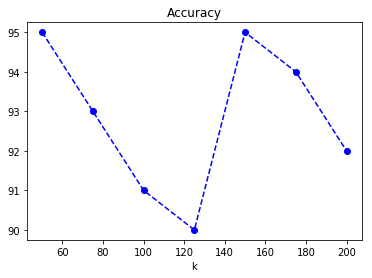

In [5]:
def plotAccuracies():
    accuracies = []
    k = range(50,225,25)

    for iter_k in k:
        accuracies.append(mnistPredict(k=iter_k))

    fig, ax = plt.subplots()
    ax.set_title('Accuracy')
    ax.set_xlabel('k')
    ax.plot(k,accuracies, linestyle='--', marker='o', color='b')
    
plotAccuracies()